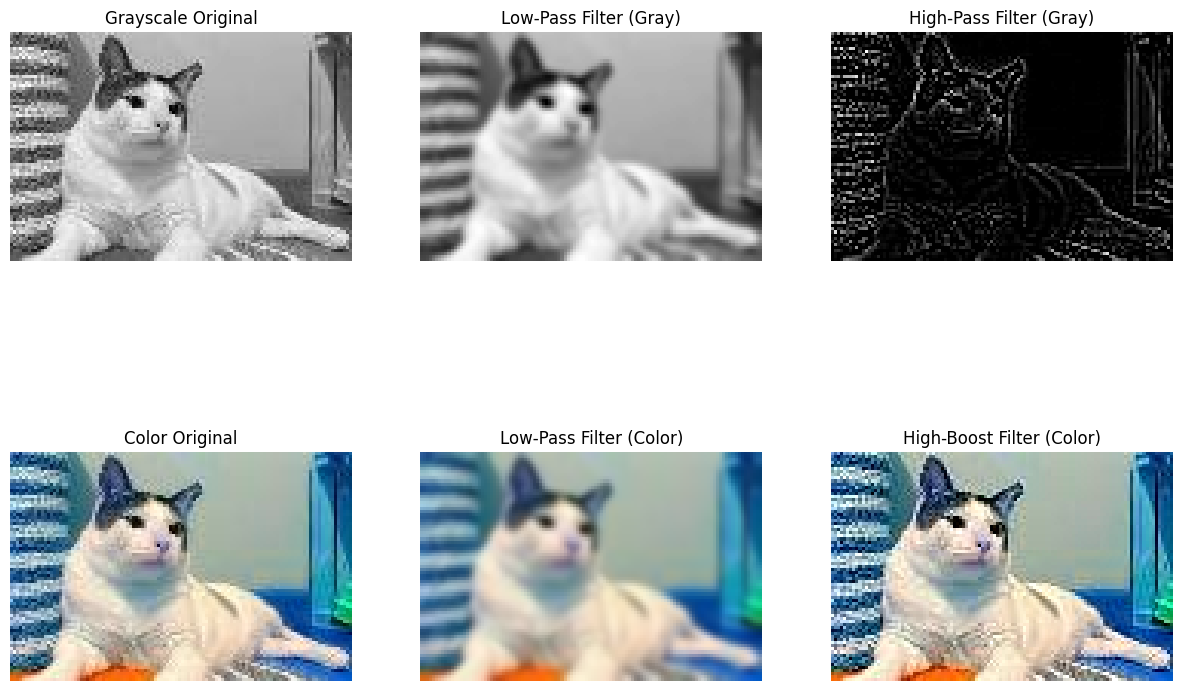

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan citra
def show_images(images, titles):
    plt.figure(figsize=(15, 10))
    for i in range(len(images)):
        plt.subplot(2, 3, i + 1)
        cmap = 'gray' if len(images[i].shape) == 2 else None
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Membaca citra dengan path yang benar
image_path = r'd:/tugas kuliah/pengolahan citra digital/kucing.jpg'
image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image_color = cv2.imread(image_path)

# Validasi apakah citra berhasil dibaca
if image_gray is None or image_color is None:
    print("Error: Citra tidak ditemukan di path yang diberikan.")
else:
    # Filter Low-Pass (Gaussian Blur)
    low_pass_gray = cv2.GaussianBlur(image_gray, (5, 5), 0)
    low_pass_color = cv2.GaussianBlur(image_color, (5, 5), 0)

    # Filter High-Pass
    high_pass_gray = cv2.subtract(image_gray, low_pass_gray)
    high_pass_color = cv2.subtract(image_color, low_pass_color)

    # Filter High-Boost
    high_boost_gray = cv2.addWeighted(image_gray, 1.5, low_pass_gray, -0.5, 0)
    high_boost_color = cv2.addWeighted(image_color, 1.5, low_pass_color, -0.5, 0)

    # Menampilkan hasil
    show_images(
        [image_gray, low_pass_gray, high_pass_gray,
         image_color, low_pass_color, high_boost_color],
        ['Grayscale Original', 'Low-Pass Filter (Gray)', 'High-Pass Filter (Gray)',
         'Color Original', 'Low-Pass Filter (Color)', 'High-Boost Filter (Color)']
    )
